In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle


from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *
from pygenstability.pygenstability import _evaluate_NVI

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.graph_sampling import multiscale_sbm
from msfiltration.msf_bootstrapping import msf_bootstrap, plot_pds, select_scales_pds

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [4]:
#plt.rcParams.update({'font.size': 20})

# MSF and PH on full multiscale SBM network


In [5]:
# Sample multiscale SBM network
A = multiscale_sbm(seed=0)

In [6]:
# Set MS parameters
n_time = 50
min_time = -1.5
max_time = 0.5

In [7]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 50/50 [00:10<00:00,  4.84it/s]


Building filtration ...


100%|██████████| 50/50 [00:08<00:00,  6.06it/s] 


Computing persistence ... 


[-1.29591837 -0.2755102   0.33673469]


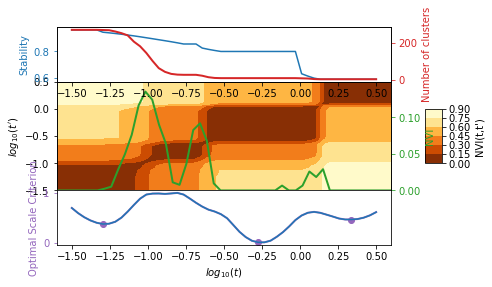

In [8]:
# select optimal scales
identify_optimal_scales(msf.ms_results,criterion_threshold=0.2,window_size=10)
selected_scales = msf.log_times[msf.ms_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(msf.ms_results)
#plt.savefig(root_fig +'MS_Scan.pdf',bbox_inches='tight')

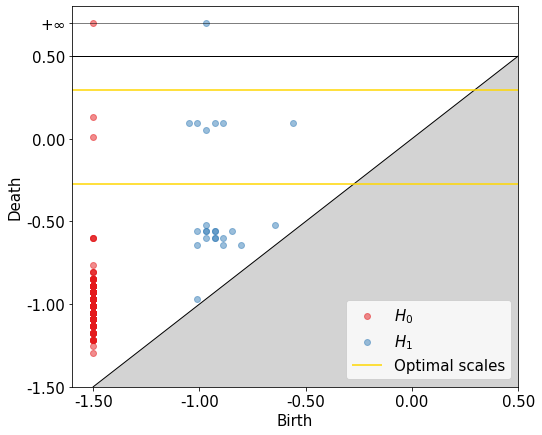

In [9]:
# Get optimal scales
msf.select_scales()
# Plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()
#plt.savefig(root_fig +'PD_SBM.pdf',bbox_inches='tight')

# Subsampling for MSF

In [10]:
n_nodes = 270
seed = 0

n_sample = 200

In [11]:
# define array of nodes
nodes = np.arange(n_nodes)

In [12]:
# initialise random number generator
rng = np.random.RandomState(seed)

In [13]:
# sample nodes
nodes_sample = rng.choice(nodes,n_sample)
nodes_sample.sort()

In [14]:
# obtain all community assignments for sampled nodes
community_ids_sampled = []
for partition in msf.community_ids:
    community_ids_sampled.append(partition[nodes_sample])

In [15]:
# initialise new MSF object for sample
msf_sample = MSF()
msf_sample.community_ids = community_ids_sampled
msf_sample.log_times = msf.log_times

In [16]:
# compute PD for sample
msf_sample.build_filtration()
msf_sample.compute_persistence()

Building filtration ...


100%|██████████| 50/50 [00:02<00:00, 22.89it/s] 


Computing persistence ... 


<AxesSubplot:xlabel='Birth', ylabel='Death'>

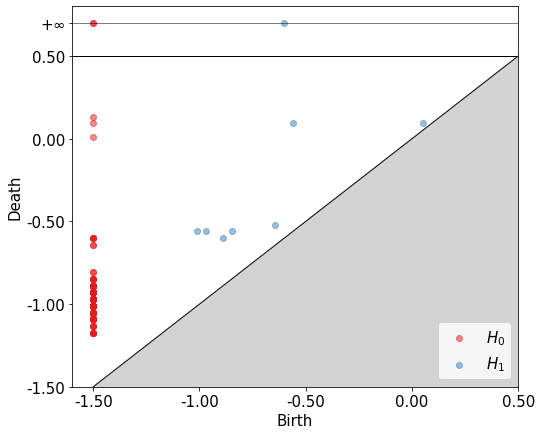

In [17]:
msf_sample.plot_persistence_diagram()

# Bootstrapping MSF

In [18]:
n_nodes = 270
seed = 0

In [19]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150


In [20]:
# define array of nodes
nodes = np.arange(n_nodes)

# initialise random number generator
rng = np.random.RandomState(seed)

# store persistences for different samples
persistences = []

for _ in range(B):

    # sample nodes
    nodes_sample = rng.choice(nodes,n_sample)
    nodes_sample.sort()

    # obtain all community assignments for sampled nodes
    community_ids_sampled = []
    for partition in msf.community_ids:
        community_ids_sampled.append(partition[nodes_sample])

    # initialise new MSF object for sample
    msf_sample = MSF()
    msf_sample.community_ids = community_ids_sampled
    msf_sample.log_times = msf.log_times

    # compute PD for sample
    msf_sample.build_filtration()
    msf_sample.compute_persistence()

    # add persistence of different dimensions to list
    persistences.append(
        [msf_sample.filtration.persistence_intervals_in_dimension(dim) for dim in range(4)]
    )


    

Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 73.21it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 71.83it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 58.59it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 61.79it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 70.39it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 71.86it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 74.85it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 65.85it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 70.01it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 66.89it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 68.79it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 67.20it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 68.91it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 73.43it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 68.00it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 69.57it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 71.78it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 69.65it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 69.57it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 62.04it/s] 


Computing persistence ... 


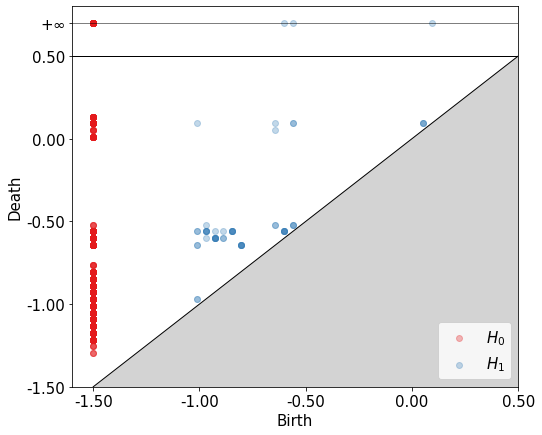

In [ ]:
fig = plot_pds(persistences,msf.log_times,alpha=0.3)

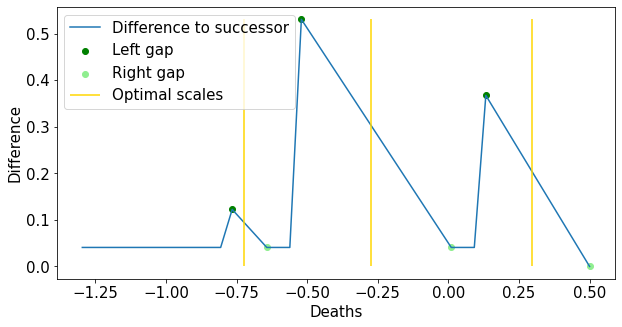

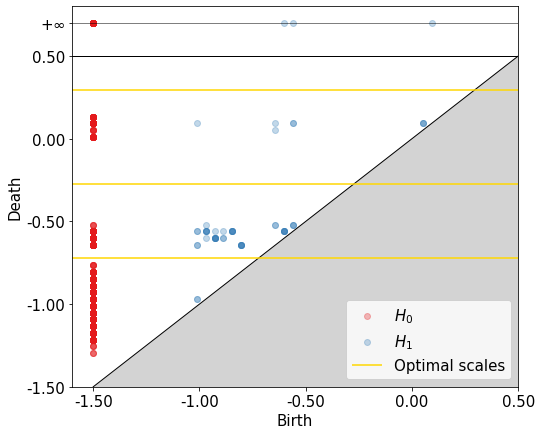

In [ ]:
# obtain optimal scales via gaps in PH
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences, msf.log_times, threshold_abs=0,min_gap_width=0.105,with_plot=True)

# plot optimal scales in PD
fig, ax = plot_pds(persistences,msf.log_times,optimal_scales_ph,alpha=0.3)
plt.savefig(root_fig +'SBM_PD_Bootstrap.pdf', dpi=fig.dpi,bbox_inches='tight')

# Using implemented function

In [18]:
persistences = msf_bootstrap(msf.community_ids,msf.log_times,150,20)

Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 65.12it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 60.89it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:01<00:00, 48.31it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 54.48it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 64.13it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 63.97it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 71.83it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 63.44it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 65.79it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 63.92it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 62.96it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 56.05it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 64.30it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 69.24it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 65.66it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 56.53it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 61.09it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 67.62it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 70.36it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 50/50 [00:00<00:00, 72.14it/s] 


Computing persistence ... 


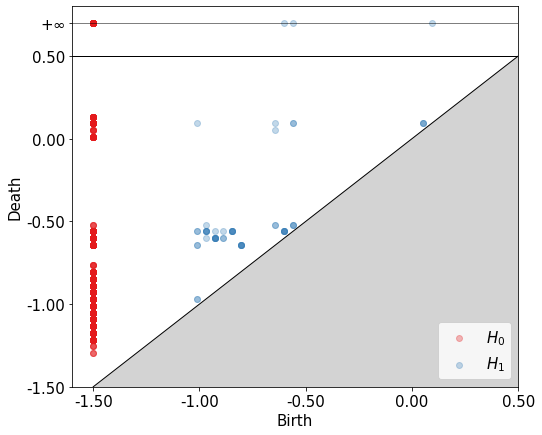

In [19]:
fig = plot_pds(persistences,msf.log_times,alpha=0.3)